# Энергетический спектр

In [1]:
!date
!pwd

Чтв Мар 23 18:02:30 MSK 2017
/home/sphere/Papers/Pictures/EnergySpectrum/2017


In [2]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [113]:
#import seaborn as sns

## настройка внешнего вида графиков в seaborn
#sns.set_style("dark")
#sns.set_palette("RdBu")
#sns.set_context("notebook", font_scale = 1.5, 
#                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })
#sns.set(style="white", color_codes=True)

In [3]:
# === read SPHERE data
filename = './data_py/Sphere.txt'
sphere = pd.read_csv(filename, sep='\s+', index_col=None)
print(sphere.shape)
sphere.y = sphere.y - 23.0
sphere['yl'] = np.log10(sphere.st + 1.0)
sphere['yh'] = np.log10(sphere.st + 1.0)
sphere['sp'] = sphere.y + np.log10(sphere.sys + 1.0)
sphere['sm'] = sphere.y - np.log10(sphere.sys + 1.0)
sphere = sphere[sphere.x > 15.7]
sphere[:]

(7, 4)


,x,y,st,sys,yl,yh,sp,sm
1,15.98641,1.52923,0.070711,0.099235,0.029672,0.029672,1.570320,1.488140
2,16.28938,1.54660,0.055815,0.064699,0.023588,0.023588,1.573827,1.519373
3,16.58987,1.47892,0.082479,0.064699,0.034419,0.034419,1.506147,1.451693
4,16.88896,1.47784,0.154303,0.095197,0.062320,0.062320,1.517332,1.438348
5,17.18917,1.55102,0.277350,0.160516,0.106310,0.106310,1.615671,1.486369
6,17.48800,1.40900,0.707107,0.257248,0.232261,0.232261,1.508421,1.309579


In [5]:
# === read KascadeGrande data
filename = './data_py/KascadeGrande.txt'

tmp = pd.read_csv(filename, sep='\s+', index_col=None)
print(tmp.shape)
tmp['yl'] = tmp.y - tmp.st
tmp['yh'] = tmp.y - tmp.st
tmp.y = tmp.y - 23.0
kascade = tmp[:] 
kascade[:3]

(19, 4)


,x,y,st,sys,yl,yh
0,16.04532,1.52690,24.52336,24.53042,0.00354,0.00354
1,16.14922,1.51212,24.50836,24.51584,0.00376,0.00376
2,16.25042,1.49083,24.48845,24.49320,0.00238,0.00238


In [7]:
# === read kascade Systematics data
filename = './data_py/KascadeSyst.txt'
tmp = pd.read_csv(filename, sep='\s+', index_col=None)
print(tmp.shape)
tmp['sp'] -= 23.0
tmp['sm'] -= 23.0
kascadesys = tmp[:] 
kascadesys[:1]

(19, 3)


,x,sp,sm
0,16.04532,1.57213,1.46638


In [8]:
# === read Akeno data
filename = './data_py/Akeno.txt'
tmp = pd.read_csv(filename, sep='\s+', index_col=None)
print(tmp.shape)
tmp['yl'] = tmp.y - tmp.st
tmp['yh'] = tmp.y - tmp.st
tmp.y = tmp.y - 23.0
akeno = tmp[:] 
akeno = akeno[akeno.x > 15.7]
akeno[:3]

(31, 4)


,x,y,st,sys,yl,yh
8,15.8,1.70,24.70,24.70,0.0,0.0
9,15.9,1.63,24.63,24.63,0.0,0.0
10,16.0,1.60,24.60,24.60,0.0,0.0


In [9]:
# === read Tunka data
filename = './data_py/TunkaCombined.txt'
tmp = pd.read_csv(filename, sep='\s+', index_col=None)
print(tmp.shape)
tmp['y']  = np.log10(tmp.v) + 3.0 * tmp.x
tmp['yl'] = np.log10(tmp.v) -  np.log10(tmp.v - np.sqrt(tmp.dy*tmp.dy+0))
tmp['yh'] = -np.log10(tmp.v) + np.log10(tmp.v + np.sqrt(tmp.dy*tmp.dy+0))
tmp.y = tmp.y - 23.0
tunka = tmp[:] 
tunka[:3]

(32, 4)


,x,v,dy,n,y,yl,yh
0,14.95,4.370197e-21,2.006533e-23,47436.0,1.490501,0.001999,0.001989
1,15.05,2.379574e-21,1.320316e-23,32482.0,1.526499,0.002416,0.002403
2,15.15,1.254594e-21,8.540181e-24,21581.0,1.548503,0.002966,0.002946


In [10]:
# === read Yakutsk data ===
filename = './data_py/Yakutsk2013.txt'
tmp = pd.read_csv(filename, sep='\s+', index_col=None)
print(tmp.shape)
tmp['x']  = np.log10(tmp.x) 
tmp['y']  = np.log10(tmp.v) - 23.0
tmp['rdy'] = tmp.dy/tmp.v
tmp['yl'] = np.log10(tmp.v) - np.log10( tmp.v - tmp.dy )
tmp['yh'] = -np.log10(tmp.v) + np.log10(tmp.v + tmp.dy)
yakutsk = tmp[:] 
yakutsk[:3]

(29, 3)


,x,v,dy,y,rdy,yl,yh
0,15.20412,3.500000e+24,1.000000e+22,1.544068,0.002857,0.001243,0.001239
1,15.30103,3.700000e+24,1.000000e+22,1.568202,0.002703,0.001175,0.001172
2,15.39794,4.000000e+24,1.000000e+22,1.602060,0.002500,0.001087,0.001084


In [11]:
Emin, Emax = 15.8, 17.8
sphere  = sphere[ sphere.x  > Emin]
kascade = kascade[(kascade.x > Emin) & (kascade.x < Emax)]
akeno   = akeno[  (akeno.x   > Emin) & (akeno.x   < Emax)]
yakutsk = yakutsk[(yakutsk.x > Emin) & (yakutsk.x < Emax)]


## Графики на английском языке

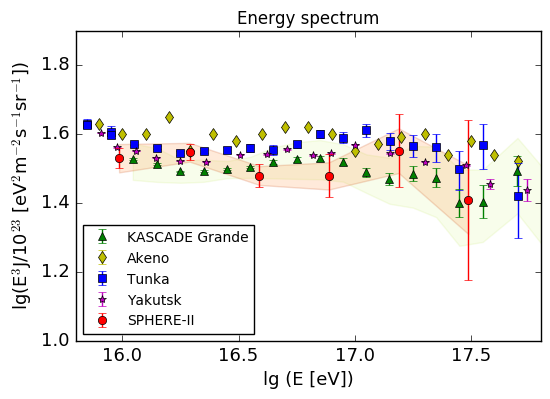

In [12]:
# === draw data ===
tmp = kascade
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='g^', label = r'KASCADE Grande')
tmp = kascadesys
plt.fill_between(tmp.x, tmp.sp, tmp.sm, 
                 alpha=0.1, edgecolor='#A8DE1B', facecolor='#C1F43E',
                 #linewidth=4, linestyle='dashdot', 
                 antialiased=True)
tmp = akeno
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='yd', label = r'Akeno')

tmp = tunka
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='bs', label = r'Tunka')

tmp = yakutsk
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='m*', label = r'Yakutsk')

yerr = np.array(sphere.yl)
plt.errorbar(sphere.x, sphere.y,  yerr = [yerr,yerr], fmt='ro', label = u'SPHERE-II')
plt.fill_between(sphere.x, sphere.sp, sphere.sm, 
                 alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848',
                 #linewidth=4, linestyle='dashdot', 
                 antialiased=True)

# === оси и надписи ===
plt.axis([Emin, Emax, 1, 1.9])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc=3, numpoints=1, fontsize = 'medium' )
plt.grid(False)

plt.rc('text', usetex=True)
plt.xlabel(r'lg (E [eV])',           fontsize = 13)
plt.ylabel(r'lg(E$^{3}$J/10$^{23}$ [eV$^{2}$m$^{-2}$s$^{-1}$sr$^{-1}$])', fontsize = 13) #'large')
plt.rc('text', usetex=False)
plt.title(u'Energy spectrum')

# === save ===
plt.savefig('en_spec_sys.png', dpi=200)
plt.savefig('en_spec_sys.eps')

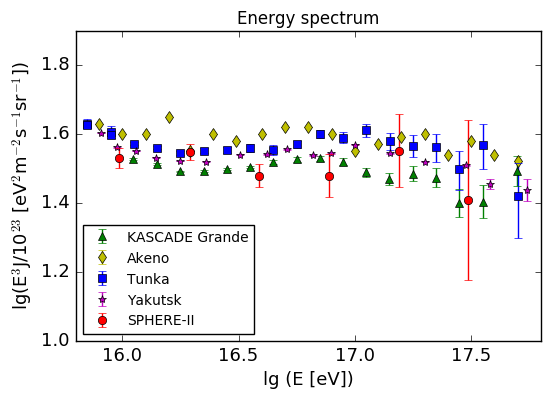

In [13]:
# === draw data ===
tmp = kascade
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='g^', label = r'KASCADE Grande')

tmp = akeno
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='yd', label = r'Akeno')

tmp = tunka
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='bs', label = r'Tunka')

tmp = yakutsk
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='m*', label = r'Yakutsk')

yerr = np.array(sphere.yl)
plt.errorbar(sphere.x, sphere.y,  yerr = [yerr,yerr], fmt='ro', label = u'SPHERE-II')

# === оси и надписи ===
plt.axis([Emin, Emax, 1, 1.9])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc=3, numpoints=1, fontsize = 'medium' )
plt.grid(False)

plt.rc('text', usetex=True)
plt.xlabel(r'lg (E [eV])',           fontsize = 13)
plt.ylabel(r'lg(E$^{3}$J/10$^{23}$ [eV$^{2}$m$^{-2}$s$^{-1}$sr$^{-1}$])', fontsize = 13) #'large')
plt.rc('text', usetex=False)
plt.title(u'Energy spectrum')

# === save ===
plt.savefig('en_spec.png', dpi=200)
plt.savefig('en_spec.eps')

## Графики на русском языке

In [14]:
# -*- coding: utf-8 -*-

#решение проблемы с выводом на график русских шрифтов
from matplotlib import rcParams
rcParams['text.usetex']=False
rcParams['font.sans-serif'] = ['Liberation Sans']
rcParams['font.serif'] = ['Liberation Serif']
plt.rc('font',**{'family':'verdana'})

In [15]:
matplotlib.rc('font', **{'family':'verdana'})
matplotlib.rc('font', family='Verdana')

In [16]:
# -*- coding: utf-8 -*-
# Cyrillic letters in Matplotlib,
# thanks to Alexey for solution, see http://koldunov.net/?p=290#comments
from matplotlib import rc
rc('font',**{'family':'serif'})
#rc('text', usetex=False)
#rc('text.latex',unicode=True)
#rc('text.latex',preamble='\usepackage[utf8]{inputenc}')
#rc('text.latex',preamble='\usepackage[russian]{babel}')

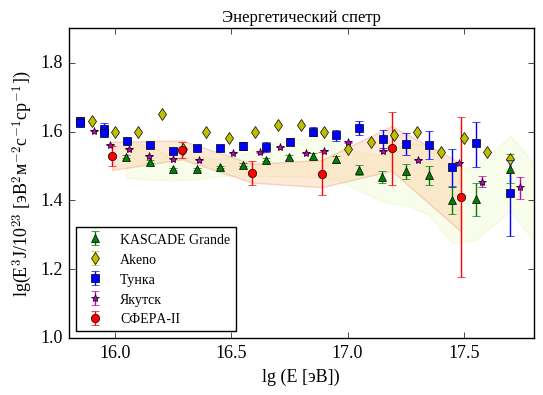

In [17]:
# === draw data ===
tmp = kascade
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='g^', label = r'KASCADE Grande')
tmp = kascadesys
plt.fill_between(tmp.x, tmp.sp, tmp.sm, 
                 alpha=0.1, edgecolor='#A8DE1B', facecolor='#C1F43E',
                 #linewidth=4, linestyle='dashdot', 
                 antialiased=True)
tmp = akeno
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='yd', label = r'Akeno')

tmp = tunka
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='bs', label = u'Тунка')

tmp = yakutsk
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='m*', label = u'Якутск')

yerr = np.array(sphere.yl)
plt.errorbar(sphere.x, sphere.y,  yerr = [yerr,yerr], fmt='ro', label = u'СФЕРА-II')
plt.fill_between(sphere.x, sphere.sp, sphere.sm, 
                 alpha=0.2, edgecolor='#CC4F1B', facecolor='#FF9848',
                 #linewidth=4, linestyle='dashdot', 
                 antialiased=True)

# === оси и надписи ===
plt.axis([Emin, Emax, 1, 1.9])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc=3, numpoints=1, fontsize = 'medium' )
plt.grid(False)

plt.title(u'Энергетический спетр')
plt.rc('text', usetex=True)
plt.xlabel(r'lg (E [эВ])',           fontsize = 13)
plt.ylabel(r'lg(E$^{3}$J/10$^{23}$ [эВ$^{2}$м$^{-2}$с$^{-1}$ср$^{-1}$])', fontsize = 13) #'large')
plt.rc('text', usetex=False)

# === save ===
plt.savefig('en_spec_sys_rus.png', dpi=200)
plt.savefig('en_spec_sys_rus.eps')

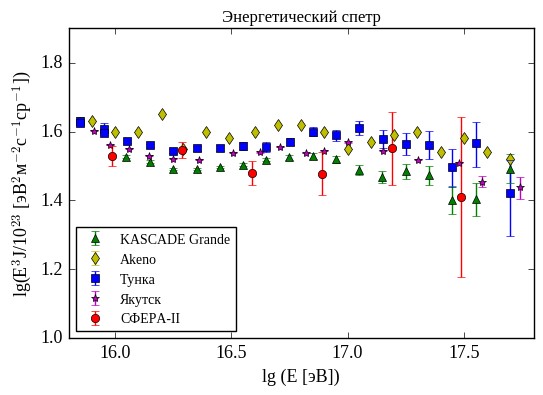

In [18]:
# === draw data ===
tmp = kascade
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='g^', label = r'KASCADE Grande')

tmp = akeno
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='yd', label = r'Akeno')

tmp = tunka
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='bs', label = u'Тунка')

tmp = yakutsk
x,y,yerr1, yerr2 = tmp.x, tmp.y, np.array(tmp.yl), np.array(tmp.yh)
plt.errorbar(x, y, yerr = [yerr1,yerr2], fmt='m*', label = u'Якутск')

yerr = np.array(sphere.yl)
plt.errorbar(sphere.x, sphere.y,  yerr = [yerr,yerr], fmt='ro', label = u'СФЕРА-II')

# === оси и надписи ===
plt.axis([Emin, Emax, 1, 1.9])
plt.tick_params(axis='both', which='major', labelsize=13)
plt.legend(loc=3, numpoints=1, fontsize = 'medium' )
plt.grid(False)

plt.title(u'Энергетический спетр')
plt.rc('text', usetex=True)
plt.xlabel(r'lg (E [эВ])',           fontsize = 13)
plt.ylabel(r'lg(E$^{3}$J/10$^{23}$ [эВ$^{2}$м$^{-2}$с$^{-1}$ср$^{-1}$])', fontsize = 13) #'large')
plt.rc('text', usetex=False)

# === save ===
plt.savefig('en_spec_rus.png', dpi=200)
plt.savefig('en_spec_rus.eps')